# Car Price Prediction  
**Goal: We are building a model to predict the price of a car based on various factors. 
Data set used in this model building pricess is taken from "Cardekho" which is  India's leading car search venture that helps users buy cars that are right for them.**
 **Accuracy of RFR: 85% 
 Accuracy of Linear Regression: 88%**


**Step1: Importing important/required Libraries.**

In [1]:
#Pandas is a Python library used for working with data sets. 
#It has functions for analyzing, cleaning, exploring, and manipulating data.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'seaborn'

**Step2: Importing the dataset and analysing**

In [2]:
# Reading and understanding the data
df = pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/car data.csv')


In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
print(df['Seller_Type'].unique())

['Dealer' 'Individual']


In [6]:
print(df['Transmission'].unique())

['Manual' 'Automatic']


In [7]:
print(df['Year'].unique())

[2014 2013 2017 2011 2018 2015 2016 2009 2010 2012 2003 2008 2006 2005
 2004 2007]


In [8]:
print(df['Fuel_Type'].unique())

['Petrol' 'Diesel' 'CNG']


In [9]:
print(df['Owner'].unique())

[0 1 3]


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


**Step3: Cheking Null values.**

In [11]:
#missing null values
df.isnull().sum()
#no null values found

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [12]:
df.describe

<bound method NDFrame.describe of     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1

In [13]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [14]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

Creating a dataframe named final_dataset that inclues only important columns that impact the output.

**Step4: Shorlisting of features that impact the output.**

In [15]:
#removing car name as it is not the feature to be considered for price prediction
final_dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [16]:
final_dataset.head()


,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [17]:
final_dataset['Current_year'] = 2023

In [18]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023


In [19]:
final_dataset['No_year'] = final_dataset['Current_year'] - final_dataset['Year']

In [20]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,No_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9


In [21]:
final_dataset.drop(['Year'], axis=1, inplace=True)

In [22]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,No_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9


inplace=true, is used to delete it permanently from the final data.

In [23]:
final_dataset.drop(['Current_year'], axis=1, inplace=True)

In [24]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


**Step5: Converting String valued columns in labels so model can be trained!
using pandas,get_dummies function**

In [25]:
final_dataset = pd.get_dummies(final_dataset, drop_first=True)

In [26]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,False,True,False,True
1,4.75,9.54,43000,0,10,True,False,False,True
2,7.25,9.85,6900,0,6,False,True,False,True
3,2.85,4.15,5200,0,12,False,True,False,True
4,4.60,6.87,42450,0,9,True,False,False,True


In [27]:
final_dataset

,Selling_Price,Present_Price,Kms_Driven,Owner,No_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,False,True,False,True
1,4.75,9.54,43000,0,10,True,False,False,True
2,7.25,9.85,6900,0,6,False,True,False,True
3,2.85,4.15,5200,0,12,False,True,False,True
4,4.60,6.87,42450,0,9,True,False,False,True
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,7,True,False,False,True
297,4.00,5.90,60000,0,8,False,True,False,True
298,3.35,11.00,87934,0,14,False,True,False,True
299,11.50,12.50,9000,0,6,True,False,False,True


**Step6: Spliting of data into input and output.**

In [28]:
X = final_dataset.iloc[:,1:]
Y = final_dataset.iloc[:,0]

**Step7: Visualizing the final data.**

In [29]:
# Feature importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,Y)
print(model.feature_importances_)

[3.88060957e-01 3.80759799e-02 3.64405430e-04 8.27591927e-02
 2.14013448e-01 1.55138150e-02 1.32982179e-01 1.28230022e-01]


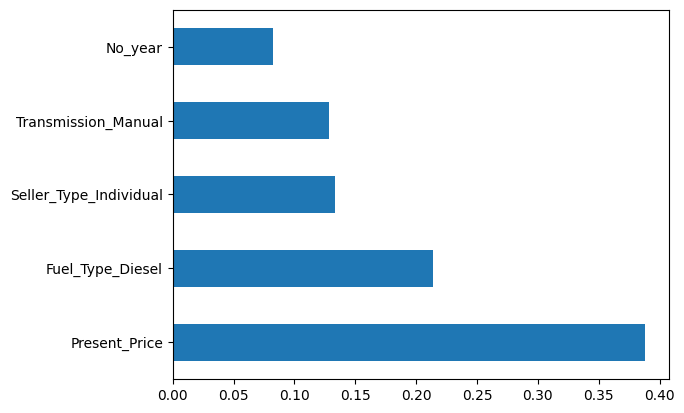

In [30]:
#ploting of feature importance using graph
g = pd.Series(model.feature_importances_, index=X.columns)
g.nlargest().plot(kind='barh')
plt.show()

In [31]:
X.head()

,Present_Price,Kms_Driven,Owner,No_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,9,False,True,False,True
1,9.54,43000,0,10,True,False,False,True
2,9.85,6900,0,6,False,True,False,True
3,4.15,5200,0,12,False,True,False,True
4,6.87,42450,0,9,True,False,False,True


In [32]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,False,True,False,True
1,4.75,9.54,43000,0,10,True,False,False,True
2,7.25,9.85,6900,0,6,False,True,False,True
3,2.85,4.15,5200,0,12,False,True,False,True
4,4.60,6.87,42450,0,9,True,False,False,True


In [33]:
X.head()

,Present_Price,Kms_Driven,Owner,No_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,9,False,True,False,True
1,9.54,43000,0,10,True,False,False,True
2,9.85,6900,0,6,False,True,False,True
3,4.15,5200,0,12,False,True,False,True
4,6.87,42450,0,9,True,False,False,True


In [34]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

**Step8: Spliting the data into training and test and building model.**

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [36]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(240, 8)
(240,)
(61, 8)
(61,)


# **Random forest Regressor Model**
A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [37]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()


In [38]:
rf_random.fit(X_train, Y_train)

RandomForestRegressor()

In [39]:
results = rf_random.predict(X_test)
diff = Y_test - results
print(diff)

27     0.7330
46    -0.5885
108    0.0276
240    0.3096
212    1.4579
        ...  
113    0.0375
173   -0.0680
246    0.4375
207    0.5835
281   -0.5280
Name: Selling_Price, Length: 61, dtype: float64


In [40]:
results

array([ 5.267 ,  3.2385,  1.1724,  5.0404,  9.7921,  5.221 ,  1.0754,
        6.7977,  5.4793,  2.443 ,  2.901 ,  4.1184, 24.6375,  4.633 ,
        0.453 ,  3.036 ,  0.7625,  2.8745,  0.5886,  1.9456,  0.2597,
        5.5201, 16.645 ,  6.0718,  0.2359, 20.4494,  2.67  ,  1.1214,
        2.5055,  6.6279,  1.1238,  0.4684,  5.3118, 15.6362,  6.8389,
        0.7165, 23.3   ,  0.1929,  5.4685,  2.1965,  9.6426,  4.9915,
        2.1095,  8.22  , 14.7504,  6.3028,  4.452 ,  3.2579,  3.477 ,
        2.756 ,  4.204 ,  0.7541,  2.6506,  0.341 ,  0.5164,  7.109 ,
        1.1125,  0.468 ,  3.3125,  4.5665,  2.628 ])

**Step9: Analying the error percentage using mae, mse, rmse and r2.**

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(Y_test, results)
mse = mean_squared_error(Y_test, results)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, results)

# Print the metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared (R²): {r2}")

MAE: 0.7107573770491806
MSE: 1.3885080472131148
RMSE: 1.1783497134607852
R-squared (R²): 0.9463920021787018


RandomForestRegressor(n_estimators=100, *, criterion="squared_error", max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
A random forest regressor.

# **Linear Regression Model**

In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [43]:
lr.fit(X_train, Y_train)

LinearRegression()

In [44]:
predictions = lr.predict(X_test)


In [45]:
diff = Y_test - predictions

In [46]:
print(diff)


27     1.899658
46     0.025331
108   -0.427210
240   -1.761141
212    3.165941
         ...   
113   -0.083349
173   -3.265979
246   -0.032356
207   -0.836327
281   -0.068465
Name: Selling_Price, Length: 61, dtype: float64


In [47]:
X_test.head()

,Present_Price,Kms_Driven,Owner,No_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
27,6.49,16200,0,6,False,True,True,True
46,4.89,64532,0,10,False,True,False,True
108,1.50,18000,0,7,False,True,True,True
240,9.40,32322,0,11,True,False,False,True
212,13.60,22671,0,7,False,True,False,True


In [48]:
predictions

array([ 4.10034187,  2.62466853,  1.62721048,  7.11114138,  8.08405947,
        4.27342319,  0.20350232,  9.0740068 ,  3.55020202,  2.03201445,
        4.33476474,  7.66044875, 20.83562388,  4.59272999,  3.42112485,
        3.57803518,  1.88370614,  4.26979077,  0.4973324 ,  2.67651699,
        0.15818599, 10.34728964, 16.65566491,  7.2259542 , -0.80960181,
       17.61585995,  3.03755063,  1.65345389,  4.08101822,  7.90962981,
        1.36048825,  1.29381876,  5.00718232, 11.47078992,  8.866686  ,
        1.55079158, 20.07267979, -9.08205503,  4.88438161,  4.44985869,
        9.76634234,  6.31359675,  2.97884012,  8.04478211, 10.82981824,
        8.74408504,  4.58910652,  3.6372169 ,  3.19835526,  3.00092631,
        4.42202033,  1.74980232,  2.36665979,  0.49114607,  0.71324495,
        8.23131198,  1.23334859,  3.6659791 ,  3.78235562,  5.98632692,
        2.16846531])

In [49]:
Y_test.head()

27      6.00
46      2.65
108     1.20
240     5.35
212    11.25
Name: Selling_Price, dtype: float64

**Step9: Analying the error percentage using mae, mse, rmse and r2.**


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, predictions)

# Print the metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared (R²): {r2}")







MAE: 1.3837414437599151
MSE: 4.989512169106765
RMSE: 2.233721596149969
R-squared (R²): 0.8073631924368945


Importing file to create a web app using the model

In [51]:
import pickle
pickle.dump(lr,open('/kaggle/working/carpricemodel.sav', 'wb'))


Used random forest regressor and linear regression algorithm to build a model to predict the price of a car with the given data which include present car price, age of car, diesel or petrol car, automatic or manual, no. of owners and the km already driven.
Both the model gives almost same predictions/output.
**Accuracy of RFR: 85%
Accuracy of Linear Regression: 88%**
